## Rental Property Market in Kuala Lumpur & Selangor

link youtube https://youtu.be/nKAAL1gKCp8
Raja Muhammad Yusof Bin Raja Zarirahim 52224222015
Muhammad Afdhalluddin Bin Annor 52224222121

In [19]:
import pandas as pd

# Load the dataset
file_path = '/Users/rajayusof/Documents/Python/tableau/mudah-apartment-kl-selangor 2.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head(3)


,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19991 non-null  int64  
 7   parking                19991 non-null  int64  
 8   bathroom               19991 non-null  int64  
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 2.1+ 

In [20]:
# Clean 'monthly_rent' to numeric values
dataset['monthly_rent'] = dataset['monthly_rent'].str.replace('RM ', '').str.replace(' per month', '').str.replace(',', '').str.replace(' ', '')

# Display the first few rows of the dataset to understand its structure
dataset.head(3)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,1000,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur


In [21]:
# Handle non-numeric and empty strings in 'rooms', 'parking', and 'bathroom' columns
def clean_column(column):
    column = column.astype(str).str.replace('.0', '').replace('', '0')
    column = column.apply(lambda x: '0' if not x.isdigit() else x)
    return column.astype(int)

dataset['rooms'] = clean_column(dataset['rooms'])
dataset['parking'] = clean_column(dataset['parking'])
dataset['bathroom'] = clean_column(dataset['bathroom'])

# Display the first few rows of the dataset to understand its structure
dataset.head(3)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur


In [22]:
dataset.count()

ads_id                   19991
prop_name                19043
completion_year          10806
monthly_rent             19989
location                 19991
property_type            19991
rooms                    19991
parking                  19991
bathroom                 19991
size                     19991
furnished                19986
facilities               17782
additional_facilities    14043
region                   19991
dtype: int64

In [23]:
# Remove rows with any missing values
cleaned_dataset = dataset.dropna()
cleaned_dataset.head(3)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
7,100322885,Arte Plus Jalan Ampang,2018.0,1550,Kuala Lumpur - Ampang,Service Residence,1,1,1,700 sq.ft.,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur


In [24]:
cleaned_dataset.count()

ads_id                   7621
prop_name                7621
completion_year          7621
monthly_rent             7621
location                 7621
property_type            7621
rooms                    7621
parking                  7621
bathroom                 7621
size                     7621
furnished                7621
facilities               7621
additional_facilities    7621
region                   7621
dtype: int64

In [27]:
# Create a new attribute with 'location' excluding 'Kuala Lumpur' and 'Selangor'
#cleaned_dataset['location_cleaned'] = cleaned_dataset['location'].str.replace('Kuala Lumpur', '', regex=False).str.replace('Selangor', '', regex=False).str.replace('-', '', regex=False).str.strip()

# Create a new attribute with 'location' excluding 'Kuala Lumpur' and 'Selangor'
cleaned_dataset['city'] = cleaned_dataset['location'].str.replace('Kuala Lumpur', '').str.replace('Selangor', '').str.replace('-', '').str.strip()

# Display the updated dataset
cleaned_dataset.head(3)


/var/folders/9t/mp26ry0x58d24ptlljpy8scc0000gn/T/ipykernel_12287/30178983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['city'] = cleaned_dataset['location'].str.replace('Kuala Lumpur', '').str.replace('Selangor', '').str.replace('-', '').str.strip()


,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,location_cleaned,city
0,100323185,The Hipster @ Taman Desa,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa,Taman Desa
3,100191767,Sentul Point Suite Apartment,2020.0,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul,Sentul
7,100322885,Arte Plus Jalan Ampang,2018.0,1550,Kuala Lumpur - Ampang,Service Residence,1,1,1,700 sq.ft.,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Ampang,Ampang


In [42]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7621 entries, 0 to 19990
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 7621 non-null   int64  
 1   prop_name              7621 non-null   object 
 2   completion_year        7621 non-null   float64
 3   monthly_rent           7621 non-null   object 
 4   location               7621 non-null   object 
 5   property_type          7621 non-null   object 
 6   rooms                  7621 non-null   int64  
 7   parking                7621 non-null   int64  
 8   bathroom               7621 non-null   int64  
 9   size                   7621 non-null   object 
 10  furnished              7621 non-null   object 
 11  facilities             7621 non-null   object 
 12  additional_facilities  7621 non-null   object 
 13  region                 7621 non-null   object 
 14  location_cleaned       7621 non-null   object 
 15  city    

In [44]:
# Ensure 'monthly_rent' is converted to numeric values
cleaned_dataset['monthly_rent'] = pd.to_numeric(cleaned_dataset['monthly_rent'], errors='coerce')

# Calculate the average value of 'monthly_rent'
average_monthly_rent = cleaned_dataset['monthly_rent'].mean()

average_monthly_rent


/var/folders/9t/mp26ry0x58d24ptlljpy8scc0000gn/T/ipykernel_12287/1181159063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['monthly_rent'] = pd.to_numeric(cleaned_dataset['monthly_rent'], errors='coerce')


2546.3533657000394

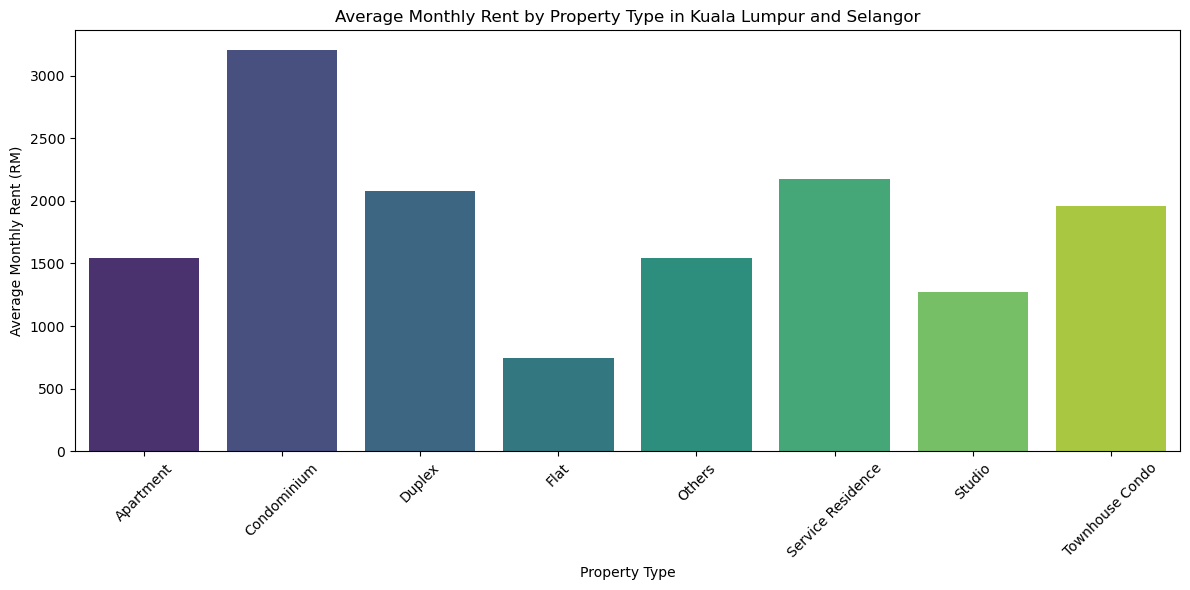

In [54]:
import seaborn as sns

# Plot the average monthly rent by property type using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='property_type', y='average_monthly_rent', data=average_rent_by_property_type, palette='viridis')
plt.xlabel('Property Type')
plt.ylabel('Average Monthly Rent (RM)')
plt.title('Average Monthly Rent by Property Type in Kuala Lumpur and Selangor')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
# Create a pivot table showing the average monthly rent by property type
pivot_table_property_price = cleaned_dataset.pivot_table(values='monthly_rent', index='property_type', aggfunc='mean').reset_index()

# Rename the columns for clarity
pivot_table_property_price.columns = ['property_type', 'average_monthly_rent']

# Sort the pivot table in descending order of average monthly rent
pivot_table_property_price = pivot_table.sort_values(by='average_monthly_rent', ascending=False)

# Display the pivot table
pivot_table_property_price


,property_type,average_monthly_rent
1,Condominium,3200.495434
5,Service Residence,2171.135300
2,Duplex,2079.926829
7,Townhouse Condo,1960.000000
4,Others,1545.882353
0,Apartment,1543.966395
6,Studio,1270.486726
3,Flat,744.800000


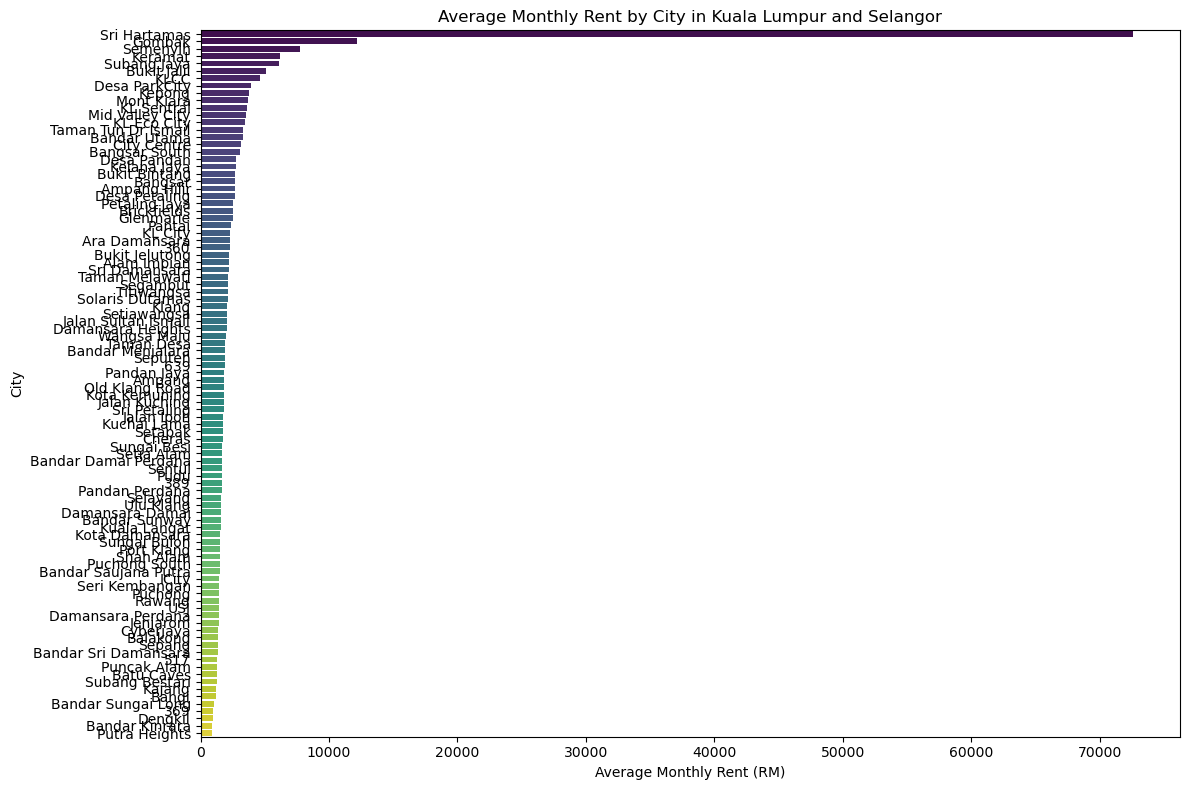

In [56]:
# Calculate the average value of 'monthly_rent' for each 'city'
average_rent_by_city = cleaned_dataset.groupby('city')['monthly_rent'].mean().reset_index()

# Rename the columns for clarity
average_rent_by_city.columns = ['city', 'average_monthly_rent']

# Sort the average rent by city in descending order
average_rent_by_city = average_rent_by_city.sort_values(by='average_monthly_rent', ascending=False)

# Plot the average monthly rent by city using seaborn in descending order
plt.figure(figsize=(12, 8))
sns.barplot(x='average_monthly_rent', y='city', data=average_rent_by_city, palette='viridis')
plt.xlabel('Average Monthly Rent (RM)')
plt.ylabel('City')
plt.title('Average Monthly Rent by City in Kuala Lumpur and Selangor')
plt.tight_layout()

# Show the plot
plt.show()


In [58]:
# Create a pivot table showing the average monthly rent by city
pivot_table_city = cleaned_dataset.pivot_table(values='monthly_rent', index='city', aggfunc='mean').reset_index()

# Rename the columns for clarity
pivot_table_city.columns = ['city', 'average_monthly_rent']

# Sort the pivot table in descending order of average monthly rent
pivot_table_city = pivot_table_city.sort_values(by='average_monthly_rent', ascending=False)

# Display the pivot table
pivot_table_city.head(10)

,city,average_monthly_rent
83,Sri Hartamas,72614.647059
37,Gombak,12177.860465
72,Semenyih,7767.346939
50,Keramat,6205.569231
86,Subang Jaya,6089.333333
24,Bukit Jalil,5119.767568
46,KLCC,4594.440945
34,Desa ParkCity,3900.000000
49,Kepong,3771.146067
57,Mont Kiara,3681.274725


In [59]:
pivot_table_city.tail(10)

,city,average_monthly_rent
67,Puncak Alam,1295.708333
21,Batu Caves,1273.849462
85,Subang Bestari,1266.333333
47,Kajang,1233.870968
18,Bangi,1207.500000
15,Bandar Sungai Long,1057.142857
1,369,1000.000000
32,Dengkil,968.315789
11,Bandar Kinrara,925.000000
68,Putra Heights,875.000000


In [61]:
cleaned_dataset.describe()

,ads_id,completion_year,monthly_rent,rooms,parking,bathroom,size_numeric
count,7.621000e+03,7621.000000,7.621000e+03,7621.000000,7621.000000,7621.000000,7621.000000
mean,9.968131e+07,2014.928225,2.546353e+03,2.592048,1.162446,1.880724,931.034772
std,4.412869e+06,6.749723,3.118488e+04,0.883108,0.777716,0.577416,637.250831
min,1.652551e+07,1977.000000,1.500000e+02,1.000000,0.000000,1.000000,1.000000
25%,9.985589e+07,2013.000000,1.300000e+03,2.000000,1.000000,2.000000,751.000000
50%,1.001870e+08,2017.000000,1.600000e+03,3.000000,1.000000,2.000000,900.000000
75%,1.006006e+08,2020.000000,2.000000e+03,3.000000,2.000000,2.000000,1068.000000
max,1.008545e+08,2025.000000,2.400000e+06,9.000000,10.000000,8.000000,48010.000000


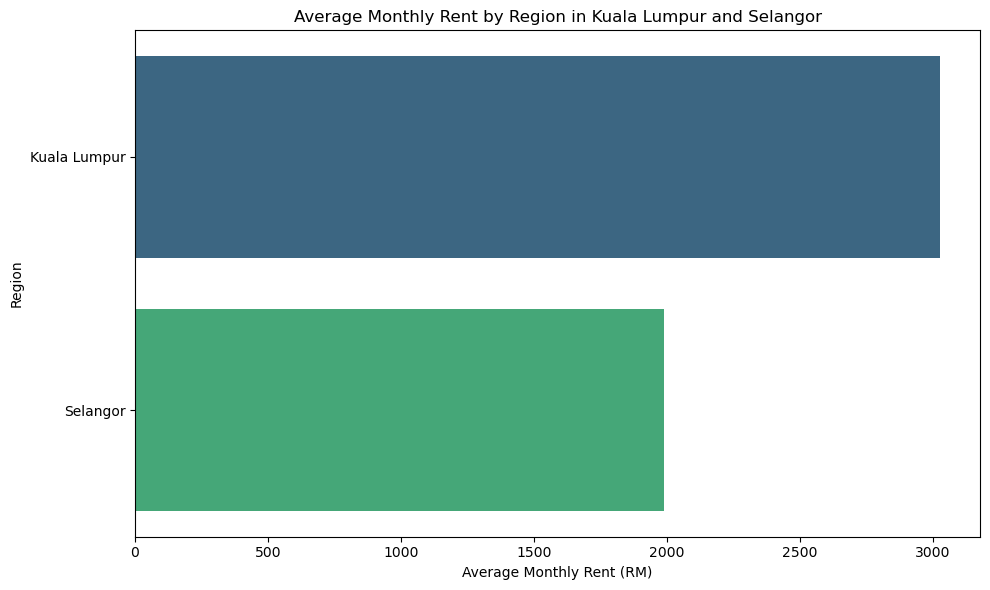

In [62]:
# Calculate the average value of 'monthly_rent' for each 'region'
average_rent_by_region = cleaned_dataset.groupby('region')['monthly_rent'].mean().reset_index()

# Rename the columns for clarity
average_rent_by_region.columns = ['region', 'average_monthly_rent']

# Sort the average rent by region in descending order
average_rent_by_region = average_rent_by_region.sort_values(by='average_monthly_rent', ascending=False)

# Plot the average monthly rent by region using seaborn in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='average_monthly_rent', y='region', data=average_rent_by_region, palette='viridis')
plt.xlabel('Average Monthly Rent (RM)')
plt.ylabel('Region')
plt.title('Average Monthly Rent by Region in Kuala Lumpur and Selangor')
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/9t/mp26ry0x58d24ptlljpy8scc0000gn/T/ipykernel_12287/1183180295.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='completion_year', y='average_monthly_rent', data=average_rent_by_year, marker='o', palette='viridis')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


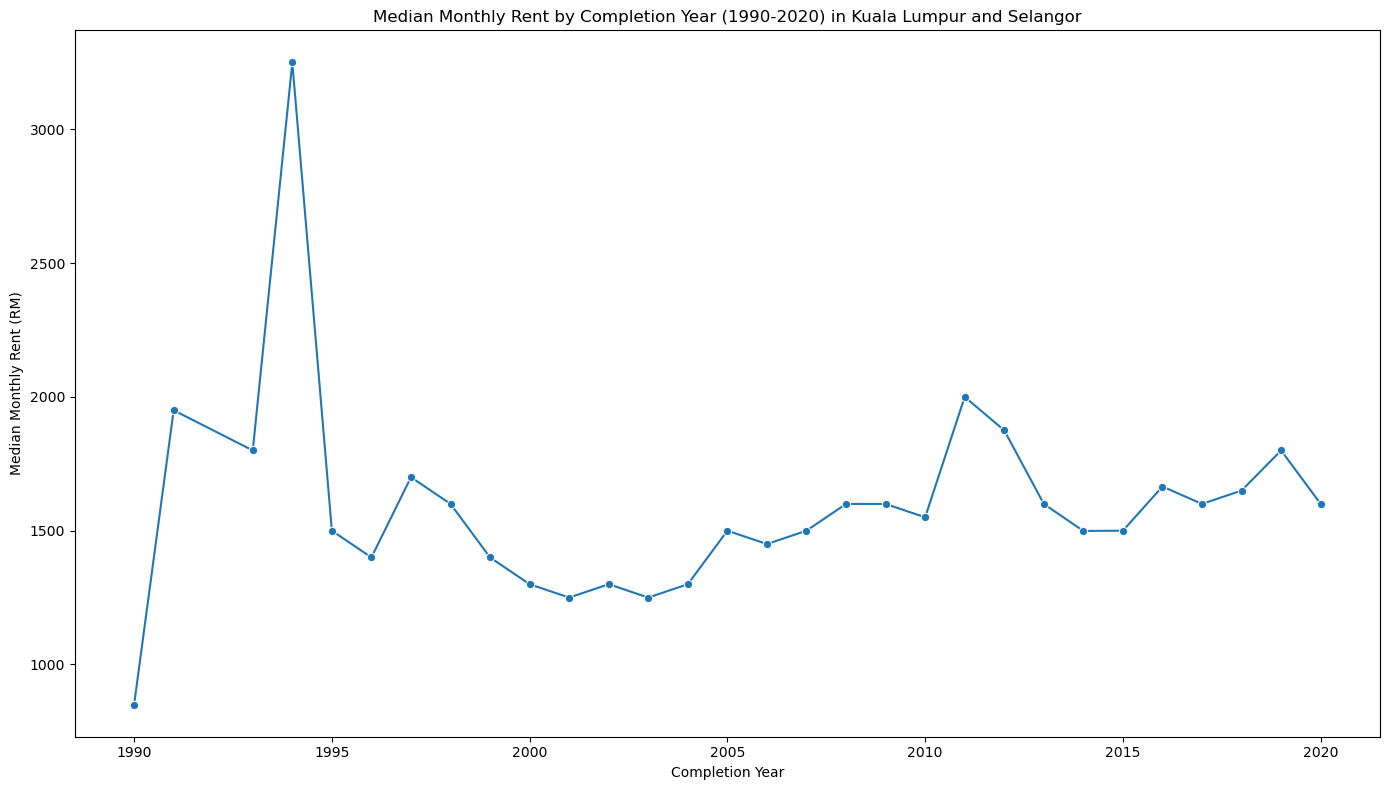

In [87]:
# Filter the dataset for completion years between 1990 and 2020
filtered_dataset = cleaned_dataset[(cleaned_dataset['completion_year'] >= 1990) & (cleaned_dataset['completion_year'] <= 2020)]

# Calculate the average value of 'monthly_rent' for each 'completion_year'
average_rent_by_year = filtered_dataset.groupby('completion_year')['monthly_rent'].median().reset_index()

# Rename the columns for clarity
average_rent_by_year.columns = ['completion_year', 'average_monthly_rent']

# Plot the average monthly rent by completion year using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='completion_year', y='average_monthly_rent', data=average_rent_by_year, marker='o', palette='viridis')
plt.xlabel('Completion Year')
plt.ylabel('Median Monthly Rent (RM)')
plt.title('Median Monthly Rent by Completion Year (1990-2020) in Kuala Lumpur and Selangor')
plt.tight_layout()

# Show the plot
plt.show()


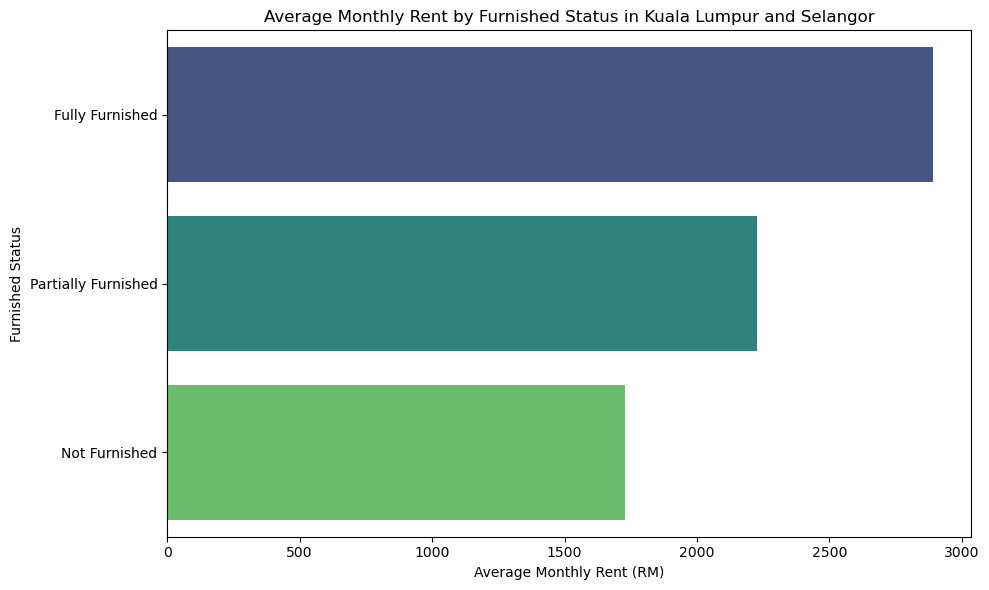

In [72]:
# Calculate the average value of 'monthly_rent' for each 'furnished' status
average_rent_by_furnished = cleaned_dataset.groupby('furnished')['monthly_rent'].mean().reset_index()

# Rename the columns for clarity
average_rent_by_furnished.columns = ['furnished', 'average_monthly_rent']

# Sort the average rent by furnished status in descending order
average_rent_by_furnished = average_rent_by_furnished.sort_values(by='average_monthly_rent', ascending=False)

# Plot the average monthly rent by furnished status using seaborn in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='average_monthly_rent', y='furnished', data=average_rent_by_furnished, palette='viridis')
plt.xlabel('Average Monthly Rent (RM)')
plt.ylabel('Furnished Status')
plt.title('Average Monthly Rent by Furnished Status in Kuala Lumpur and Selangor')
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
# Create a pivot table showing the average monthly rent by furnished status
pivot_table_furnished = cleaned_dataset.pivot_table(values='monthly_rent', index='furnished', aggfunc='mean').reset_index()

# Rename the columns for clarity
pivot_table_furnished.columns = ['furnished', 'average_monthly_rent']

# Sort the pivot table in descending order of average monthly rent
pivot_table_furnished = pivot_table_furnished.sort_values(by='average_monthly_rent', ascending=False)

# Display the pivot table
pivot_table_furnished


,furnished,average_monthly_rent
0,Fully Furnished,2891.338753
2,Partially Furnished,2226.384456
1,Not Furnished,1727.552066


In [75]:
cleaned_dataset.head(3)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,location_cleaned,city,size_numeric
0,100323185,The Hipster @ Taman Desa,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa,Taman Desa,1842.0
3,100191767,Sentul Point Suite Apartment,2020.0,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul,Sentul,743.0
7,100322885,Arte Plus Jalan Ampang,2018.0,1550,Kuala Lumpur - Ampang,Service Residence,1,1,1,700 sq.ft.,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Ampang,Ampang,700.0


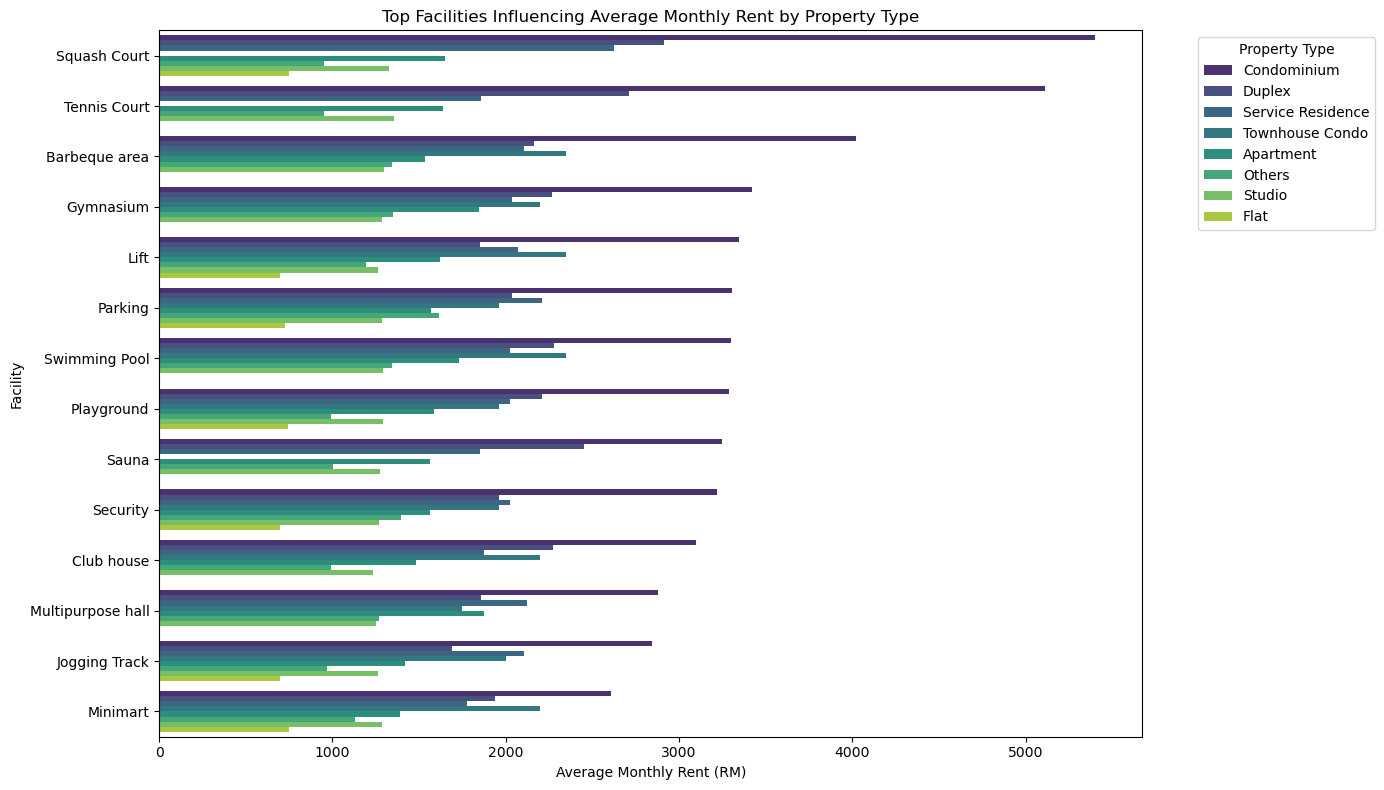

In [77]:
# Extract facilities for each property type
facilities_data = cleaned_dataset[['property_type', 'monthly_rent', 'facilities']].dropna()

# Split the facilities into individual items
facilities_data['facilities'] = facilities_data['facilities'].str.split(',')

# Explode the facilities into individual rows
facilities_data = facilities_data.explode('facilities')

# Strip any leading/trailing whitespace from the facilities
facilities_data['facilities'] = facilities_data['facilities'].str.strip()

# Calculate the average rent for each facility within each property type
average_rent_by_facility = facilities_data.groupby(['property_type', 'facilities'])['monthly_rent'].mean().reset_index()

# Rename the columns for clarity
average_rent_by_facility.columns = ['property_type', 'facility', 'average_monthly_rent']

# Sort the data by average monthly rent in descending order
average_rent_by_facility = average_rent_by_facility.sort_values(by='average_monthly_rent', ascending=False)

# Plot the top facilities by average monthly rent for each property type using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='average_monthly_rent', y='facility', hue='property_type', data=average_rent_by_facility, palette='viridis')
plt.xlabel('Average Monthly Rent (RM)')
plt.ylabel('Facility')
plt.title('Top Facilities Influencing Average Monthly Rent by Property Type')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
# Ensure the facilities column is properly processed
facilities_data['facilities'] = facilities_data['facilities'].str.strip()

# Create a pivot table showing the average monthly rent by facility and property type
pivot_table_facility = facilities_data.pivot_table(values='monthly_rent', index='facilities', columns='property_type', aggfunc='mean').reset_index()

# Sort the pivot table in descending order of the highest average monthly rent across any property type
pivot_table_facility['max_average_rent'] = pivot_table_facility.drop('facilities', axis=1).max(axis=1)
pivot_table_facility = pivot_table_facility.sort_values(by='max_average_rent', ascending=False).drop('max_average_rent', axis=1)

# Display the pivot table
pivot_table_facility


property_type,facilities,Apartment,Condominium,Duplex,Flat,Others,Service Residence,Studio,Townhouse Condo
11,Squash Court,1650.136364,5403.343778,2911.538462,750.000000,950.000000,2627.553596,1324.875000,NaN
13,Tennis Court,1639.415663,5112.042639,2709.375000,NaN,950.000000,1856.485800,1353.266667,NaN
0,Barbeque area,1533.149123,4018.771945,2164.000000,NaN,1344.166667,2102.569990,1299.821918,2350.0
2,Gymnasium,1844.750929,3420.407588,2268.031250,NaN,1348.461538,2033.463335,1284.660000,2200.0
4,Lift,1619.622928,3344.521117,1851.411765,699.600000,1192.857143,2068.419092,1265.093458,2350.0
7,Parking,1568.936053,3308.627793,2034.617647,725.000000,1613.333333,2206.879401,1286.861702,1960.0
12,Swimming Pool,1728.087407,3298.913673,2276.677419,NaN,1344.166667,2023.319164,1289.190476,2350.0
8,Playground,1584.415808,3290.001829,2209.892857,744.222222,993.636364,2027.167356,1290.368421,1960.0
9,Sauna,1564.427083,3248.761057,2450.000000,NaN,1004.285714,1854.310499,1272.925926,NaN
10,Security,1565.074389,3216.325723,1958.384615,700.000000,1395.000000,2021.994041,1271.500000,1960.0
